In [1]:
#EXPERIMENT 2. neural network from scratch using numpy on mnist dataset
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

LOAD AND DISPLAY ORIGINAL MNIST IMAGES
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded training data: (60000, 28, 28)
Loaded test data: (10000, 28, 28)
Original images saved as '01_original_images.png'


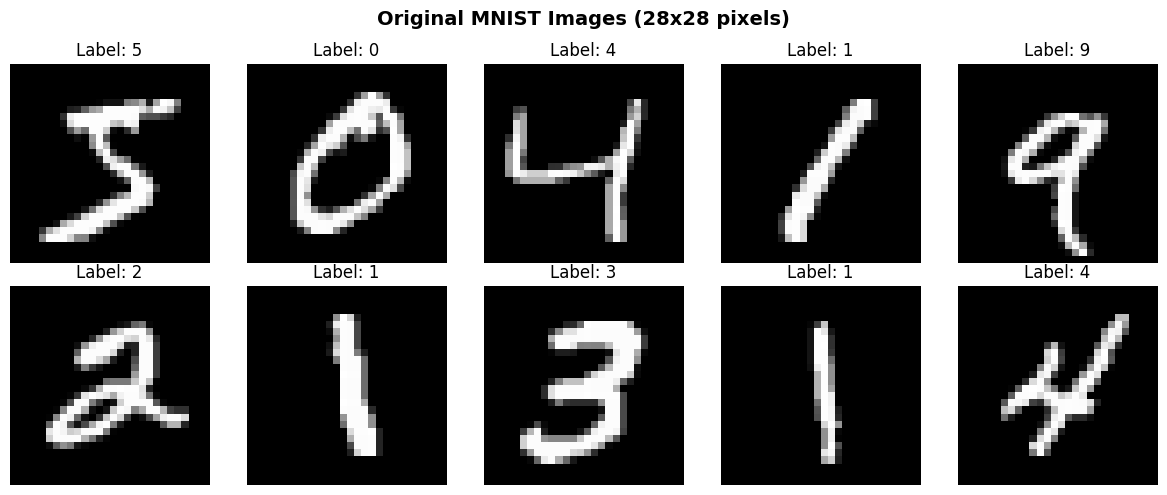

In [2]:
# LOAD AND DISPLAY ORIGINAL IMAGES
print("LOAD AND DISPLAY ORIGINAL MNIST IMAGES")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Loaded training data: {X_train.shape}")
print(f"Loaded test data: {X_test.shape}")

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    axes[i//5, i%5].imshow(X_train[i], cmap='gray')
    axes[i//5, i%5].set_title(f"Label: {y_train[i]}")
    axes[i//5, i%5].axis('off')
plt.suptitle('Original MNIST Images (28x28 pixels)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('01_original_images.png', dpi=100, bbox_inches='tight')
print("Original images saved as '01_original_images.png'")
plt.show()

In [3]:
# PREPROCESS DATA
print("PREPROCESS DATA - FLATTEN AND NORMALIZE")
X_train_original = X_train.copy()
print(f"Original shape: {X_train.shape}")
X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_test = X_test.reshape(X_test.shape[0], -1).astype(np.float32)
print(f"Flattened to: {X_train.shape}")
X_train /= 255.0
X_test /= 255.0
print(f"Normalized pixel values to [0, 1]")
print(f"Using complete dataset: {X_train.shape}")

PREPROCESS DATA - FLATTEN AND NORMALIZE
Original shape: (60000, 28, 28)
Flattened to: (60000, 784)
Normalized pixel values to [0, 1]
Using complete dataset: (60000, 784)


DISPLAY NORMALIZED IMAGES
Normalized images saved as '02_normalized_images.png'


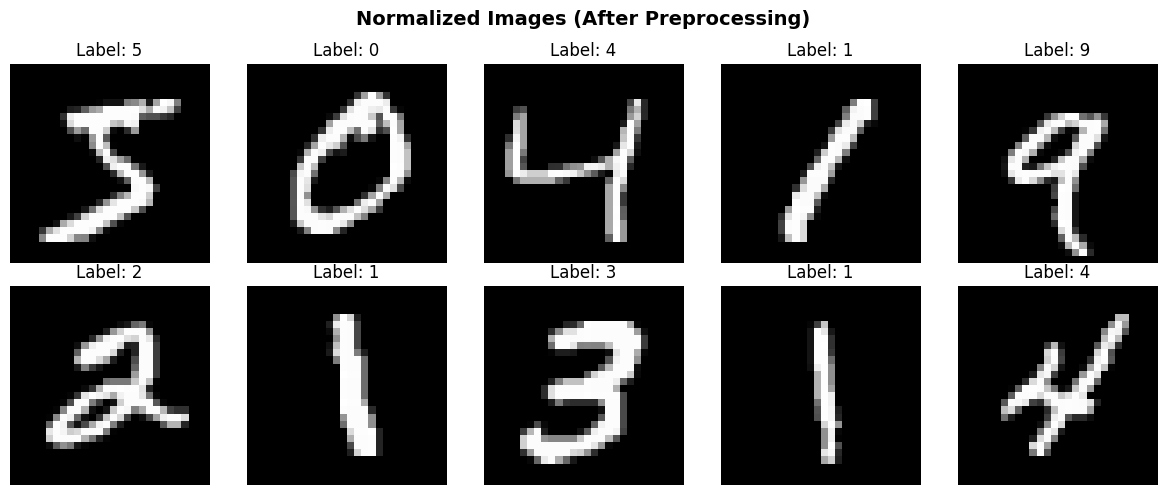

In [4]:
# DISPLAY NORMALIZED IMAGES
print("DISPLAY NORMALIZED IMAGES")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    axes[i//5, i%5].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i//5, i%5].set_title(f"Label: {y_train[i]}")
    axes[i//5, i%5].axis('off')
plt.suptitle('Normalized Images (After Preprocessing)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('02_normalized_images.png', dpi=100, bbox_inches='tight')
print("Normalized images saved as '02_normalized_images.png'")
plt.show()

PIXEL VALUE DISTRIBUTION ANALYSIS
Pixel distribution plot saved as '03_pixel_distribution.png'


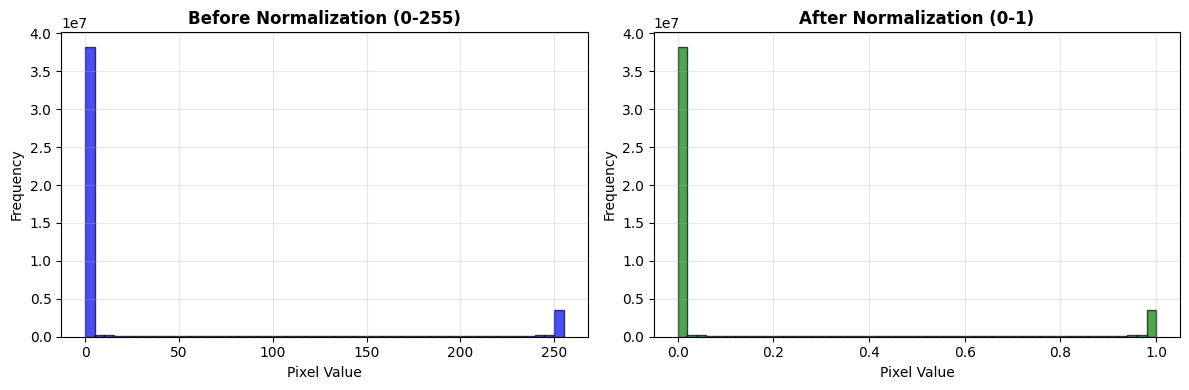

In [5]:
# SHOW PIXEL VALUE DISTRIBUTION
print("PIXEL VALUE DISTRIBUTION ANALYSIS")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(X_train_original.flatten(), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Before Normalization (0-255)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)
axes[1].hist(X_train.flatten(), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('After Normalization (0-1)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('03_pixel_distribution.png', dpi=100, bbox_inches='tight')
print("Pixel distribution plot saved as '03_pixel_distribution.png'")
plt.show()

In [6]:
# ONE-HOT ENCODING FOR LABELS
print("ONE-HOT ENCODING LABELS")
def one_hot_encode(y):
    one_hot = np.zeros((y.shape[0], 10))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot
y_train_enc = one_hot_encode(y_train)
print(f"Original label shape: {y_train.shape}")
print(f"One-hot encoded shape: {y_train_enc.shape}")
print(f"Example: Label 3 → {y_train_enc[np.where(y_train == 3)[0][0]]}")

ONE-HOT ENCODING LABELS
Original label shape: (60000,)
One-hot encoded shape: (60000, 10)
Example: Label 3 → [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
# DEFINE ACTIVATION FUNCTIONS
print("DEFINE ACTIVATION FUNCTIONS")
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_deriv(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

print("ReLU activation function defined")
print("Leaky ReLU activation function defined")
print("Softmax activation function defined")


DEFINE ACTIVATION FUNCTIONS
ReLU activation function defined
Leaky ReLU activation function defined
Softmax activation function defined


In [8]:
# INITIALIZE NEURAL NETWORK WEIGHTS AND BIASES
print("INITIALIZE WEIGHTS AND BIASES")
layer_sizes = [784, 256, 128, 64, 32, 10]
learning_rate = 0.05
activation = 'leaky_relu'
print(f"Network Architecture: {layer_sizes}")
print(f"Learning Rate: {learning_rate}")
print(f"Activation Function: {activation}")
weights = []
biases = []
for i in range(len(layer_sizes) - 1):
    w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
    b = np.zeros((1, layer_sizes[i+1]))
    weights.append(w)
    biases.append(b)
    print(f"Layer {i+1}: {layer_sizes[i]} → {layer_sizes[i+1]}")

INITIALIZE WEIGHTS AND BIASES
Network Architecture: [784, 256, 128, 64, 32, 10]
Learning Rate: 0.05
Activation Function: leaky_relu
Layer 1: 784 → 256
Layer 2: 256 → 128
Layer 3: 128 → 64
Layer 4: 64 → 32
Layer 5: 32 → 10


In [9]:
# DEFINE FORWARD PROPAGATION
print("FORWARD PROPAGATION FUNCTION")
def forward_pass(X, w, b):
    cache = {'A0': X}
    A = X
    for i in range(len(w) - 1):
        Z = np.dot(A, w[i]) + b[i]
        if activation == 'leaky_relu':
            A = leaky_relu(Z)
        else:
            A = relu(Z)
        cache[f'Z{i+1}'] = Z
        cache[f'A{i+1}'] = A
    Z_out = np.dot(A, w[-1]) + b[-1]
    A_out = softmax(Z_out)
    cache[f'Z{len(w)}'] = Z_out
    cache[f'A{len(w)}'] = A_out
    return A_out, cache

FORWARD PROPAGATION FUNCTION


In [10]:
# DEFINE LOSS FUNCTION
print("LOSS FUNCTION (CROSS-ENTROPY)")
def compute_loss(Y_pred, Y_true):
    m = Y_true.shape[0]
    Y_pred_clip = np.clip(Y_pred, 1e-7, 1 - 1e-7)
    loss = -np.mean(np.sum(Y_true * np.log(Y_pred_clip), axis=1))
    return loss

LOSS FUNCTION (CROSS-ENTROPY)


In [11]:
# DEFINE BACKWARD PROPAGATION (GRADIENT CALCULATION)
print("BACKWARD PROPAGATION FUNCTION")
def backward_pass(Y_pred, Y_true, cache, w, b):
    """Calculate gradients using chain rule"""
    m = Y_true.shape[0]
    dA = Y_pred - Y_true
    dW_list = []
    dB_list = []

    for i in range(len(w) - 1, -1, -1):
        dW = np.dot(cache[f'A{i}'].T, dA) / m
        dB = np.sum(dA, axis=0, keepdims=True) / m
        dW_list.insert(0, dW)
        dB_list.insert(0, dB)

        if i > 0:
            dA = np.dot(dA, w[i].T)
            if activation == 'leaky_relu':
                dA = dA * leaky_relu_deriv(cache[f'Z{i}'])
            else:
                dA = dA * relu_deriv(cache[f'Z{i}'])

    return dW_list, dB_list

print("Backward propagation function created")


BACKWARD PROPAGATION FUNCTION
Backward propagation function created


In [17]:
# TRAINING
print("TRAINING THE NETWORK")
epochs = 40
batch_size = 32

print(f"Epochs: {epochs}")
print(f"Batch Size: {batch_size}")
print(f"Total training samples: {X_train.shape[0]}")
print()

losses = []
for epoch in range(epochs):
    epoch_loss = 0
    num_batches = len(X_train) // batch_size

    for batch in range(num_batches):
        start = batch * batch_size
        end = start + batch_size
        X_batch = X_train[start:end]
        Y_batch = y_train_enc[start:end]

        Y_pred, cache = forward_pass(X_batch, weights, biases)
        loss = compute_loss(Y_pred, Y_batch)
        epoch_loss += loss

        dW_list, dB_list = backward_pass(Y_pred, Y_batch, cache, weights, biases)

        # Update weights
        for i in range(len(weights)):
            weights[i] -= learning_rate * dW_list[i]
            biases[i] -= learning_rate * dB_list[i]

    avg_loss = epoch_loss / num_batches
    losses.append(avg_loss)

    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch + 1:2d}/{epochs}, Loss: {avg_loss:.4f}")

print("\nTraining completed")

TRAINING THE NETWORK
Epochs: 40
Batch Size: 32
Total training samples: 60000

Epoch  2/40, Loss: 0.0000
Epoch  4/40, Loss: 0.0000
Epoch  6/40, Loss: 0.0000
Epoch  8/40, Loss: 0.0000
Epoch 10/40, Loss: 0.0000
Epoch 12/40, Loss: 0.0000
Epoch 14/40, Loss: 0.0000
Epoch 16/40, Loss: 0.0000
Epoch 18/40, Loss: 0.0000
Epoch 20/40, Loss: 0.0000
Epoch 22/40, Loss: 0.0000
Epoch 24/40, Loss: 0.0000
Epoch 26/40, Loss: 0.0000
Epoch 28/40, Loss: 0.0000
Epoch 30/40, Loss: 0.0000
Epoch 32/40, Loss: 0.0000
Epoch 34/40, Loss: 0.0000
Epoch 36/40, Loss: 0.0000
Epoch 38/40, Loss: 0.0000
Epoch 40/40, Loss: 0.0000

Training completed


In [18]:
# EVALUATE MODEL ACCURACY
print("MODEL EVALUATION")

Y_train_pred, _ = forward_pass(X_train, weights, biases)
train_preds = np.argmax(Y_train_pred, axis=1)
train_accuracy = np.mean(train_preds == y_train)

Y_test_pred, _ = forward_pass(X_test, weights, biases)
test_preds = np.argmax(Y_test_pred, axis=1)
test_accuracy = np.mean(test_preds == y_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

MODEL EVALUATION
Train Accuracy: 100.00%
Test Accuracy: 98.41%


PLOT TRAINING LOSS CURVE
Loss curve saved as '04_training_loss.png'


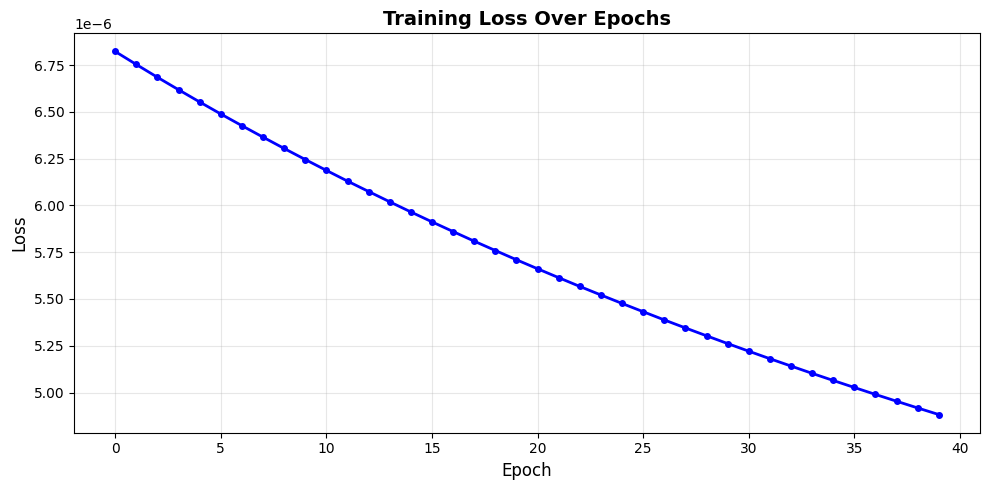

In [19]:
# PLOT TRAINING LOSS CURVE
print("PLOT TRAINING LOSS CURVE")
plt.figure(figsize=(10, 5))
plt.plot(losses, linewidth=2, color='blue', marker='o', markersize=4)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('04_training_loss.png', dpi=100, bbox_inches='tight')
print("Loss curve saved as '04_training_loss.png'")
plt.show()

VISUALIZE TEST PREDICTIONS
Predictions saved as '05_predictions.png'


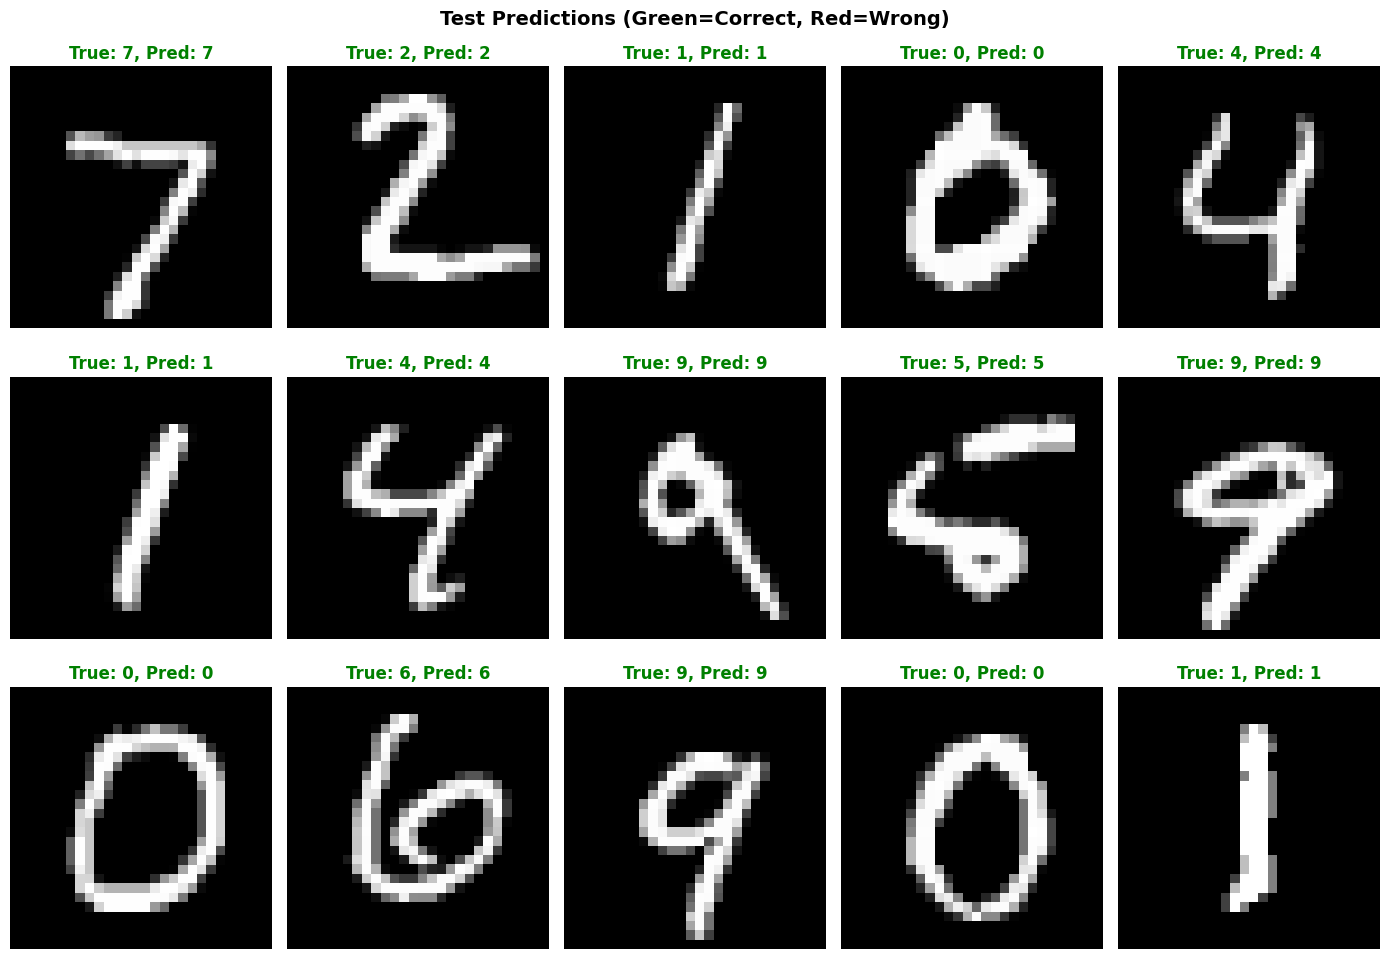

In [20]:
# VISUALIZE PREDICTIONS
print("VISUALIZE TEST PREDICTIONS")
fig, axes = plt.subplots(3, 5, figsize=(14, 10))
fig.suptitle('Test Predictions (Green=Correct, Red=Wrong)', fontsize=14, fontweight='bold')
for idx in range(15):
    row = idx // 5
    col = idx % 5
    original_img = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = test_preds[idx]
    axes[row, col].imshow(original_img, cmap='gray')
    color = 'green' if true_label == pred_label else 'red'
    axes[row, col].set_title(f"True: {true_label}, Pred: {pred_label}", color=color, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('05_predictions.png', dpi=100, bbox_inches='tight')
print("Predictions saved as '05_predictions.png'")
plt.show()

CONFUSION MATRIX ANALYSIS
Confusion matrix saved as '06_confusion_matrix.png'


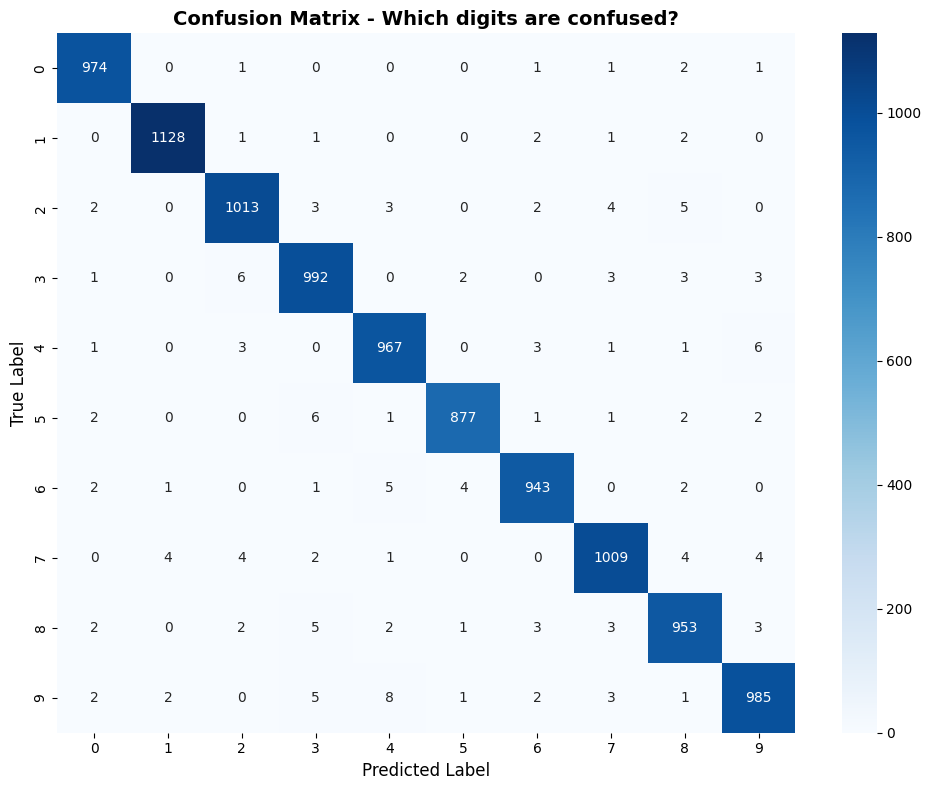

In [21]:
# CONFUSION MATRIX ANALYSIS
print("CONFUSION MATRIX ANALYSIS")
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - Which digits are confused?', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.savefig('06_confusion_matrix.png', dpi=100, bbox_inches='tight')
print("Confusion matrix saved as '06_confusion_matrix.png'")
plt.show()

WORST PREDICTIONS (MOST CONFIDENT MISTAKES)
Worst predictions saved as '07_worst_predictions.png'


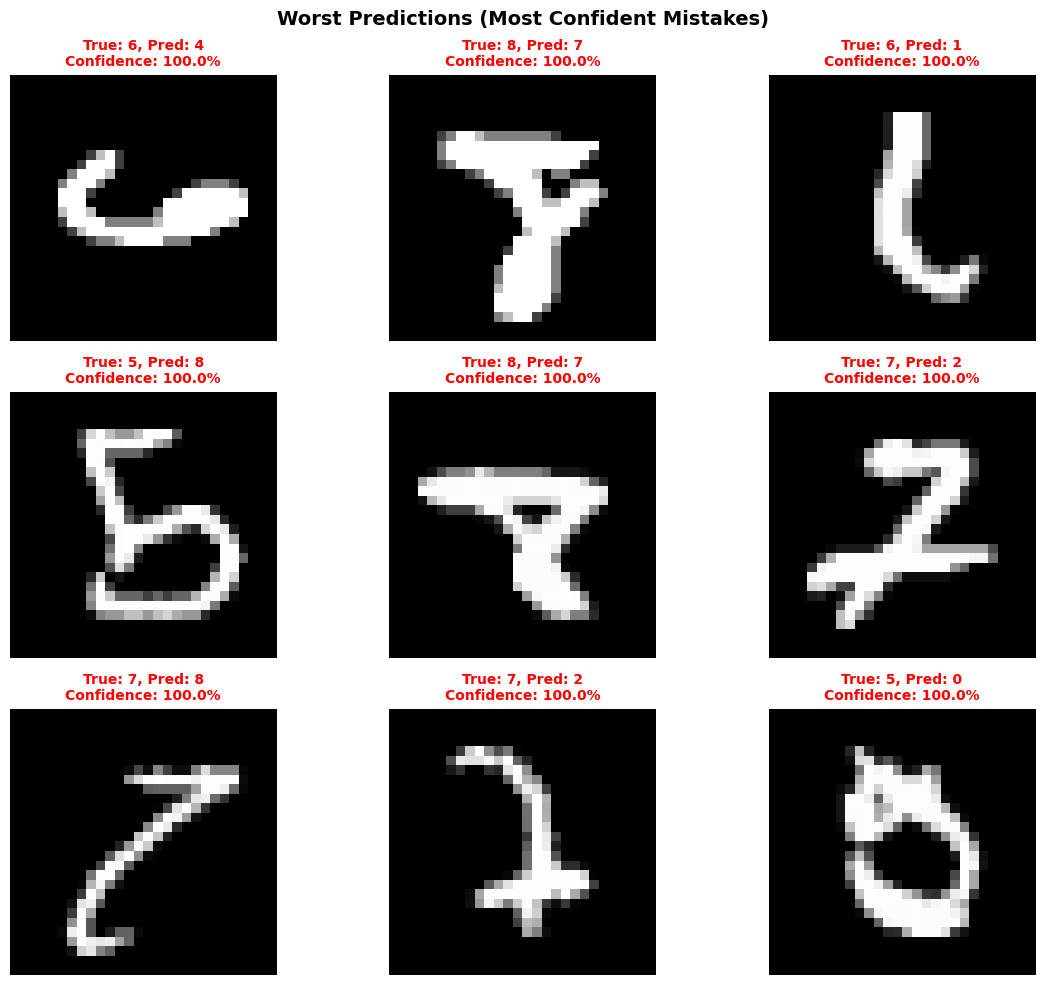

In [22]:
# SHOW WORST PREDICTIONS
print("WORST PREDICTIONS (MOST CONFIDENT MISTAKES)")

max_probs = np.max(Y_test_pred, axis=1)
wrong_preds = test_preds != y_test
wrong_indices = np.where(wrong_preds)[0]

if len(wrong_indices) > 0:
    worst_indices = wrong_indices[np.argsort(-max_probs[wrong_indices])[:9]]
    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    fig.suptitle('Worst Predictions (Most Confident Mistakes)', fontsize=14, fontweight='bold')

    for i, idx in enumerate(worst_indices):
        row = i // 3
        col = i % 3
        original_img = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        pred_label = test_preds[idx]
        confidence = max_probs[idx] * 100
        axes[row, col].imshow(original_img, cmap='gray')
        axes[row, col].set_title(f"True: {true_label}, Pred: {pred_label}\nConfidence: {confidence:.1f}%",
                                 color='red', fontweight='bold', fontsize=10)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig('07_worst_predictions.png', dpi=100, bbox_inches='tight')
    print("Worst predictions saved as '07_worst_predictions.png'")
    plt.show()
else:
    print("No wrong predictions found! Perfect accuracy!")


In [23]:
# SUMMARY
print("TRAINING COMPLETE")
print(f"Final Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print("\nGenerated Visualizations:")
print("  1. 01_original_images.png")
print("  2. 02_normalized_images.png")
print("  3. 03_pixel_distribution.png")
print("  4. 04_training_loss.png")
print("  5. 05_predictions.png")
print("  6. 06_confusion_matrix.png")
print("  7. 07_worst_predictions.png")

TRAINING COMPLETE
Final Train Accuracy: 100.00%
Final Test Accuracy: 98.41%

Generated Visualizations:
  1. 01_original_images.png
  2. 02_normalized_images.png
  3. 03_pixel_distribution.png
  4. 04_training_loss.png
  5. 05_predictions.png
  6. 06_confusion_matrix.png
  7. 07_worst_predictions.png
